In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

CSVs downloaded from https://www.kaggle.com/datasets/muhammadehsan000/olympic-historical-dataset-1896-2020

In [98]:
medal_tally_df = pd.read_csv("Olympic_Games_Medal_Tally.csv")
athlete_bio_df = pd.read_csv("Olympic_Athlete_Bio.csv")
results_df = pd.read_csv("Olympic_Results.csv")
athlete_event_results_df = pd.read_csv("Olympic_Athlete_Event_Results.csv")
games_df = pd.read_csv("Olympics_Games.csv")
country_codes_df = pd.read_csv("Olympics_Country.csv")

In [99]:
athlete_event_results_df.info()
athlete_event_results_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316834 entries, 0 to 316833
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   edition      316834 non-null  object
 1   edition_id   316834 non-null  int64 
 2   country_noc  316834 non-null  object
 3   sport        316834 non-null  object
 4   event        316834 non-null  object
 5   result_id    316834 non-null  int64 
 6   athlete      316834 non-null  object
 7   athlete_id   316834 non-null  int64 
 8   pos          316834 non-null  object
 9   medal        44687 non-null   object
 10  isTeamSport  316834 non-null  bool  
dtypes: bool(1), int64(3), object(7)
memory usage: 24.5+ MB


,edition,edition_id,country_noc,sport,event,result_id,athlete,athlete_id,pos,medal,isTeamSport
0,1908 Summer Olympics,5,ANZ,Athletics,"100 metres, Men",56265,Ernest Hutcheon,64710,DNS,NaN,False
1,1908 Summer Olympics,5,ANZ,Athletics,"400 metres, Men",56313,Henry Murray,64756,DNS,NaN,False
2,1908 Summer Olympics,5,ANZ,Athletics,"800 metres, Men",56338,Harvey Sutton,64808,3 h8 r1/2,NaN,False
3,1908 Summer Olympics,5,ANZ,Athletics,"800 metres, Men",56338,Guy Haskins,922519,DNS,NaN,False
4,1908 Summer Olympics,5,ANZ,Athletics,"800 metres, Men",56338,Joseph Lynch,64735,DNS,NaN,False


In [100]:
games_df.info()
games_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   edition           64 non-null     object
 1   edition_id        64 non-null     int64 
 2   edition_url       64 non-null     object
 3   year              64 non-null     int64 
 4   city              64 non-null     object
 5   country_flag_url  64 non-null     object
 6   country_noc       64 non-null     object
 7   start_date        55 non-null     object
 8   end_date          54 non-null     object
 9   competition_date  64 non-null     object
 10  isHeld            5 non-null      object
dtypes: int64(2), object(9)
memory usage: 5.6+ KB


,edition,edition_id,edition_url,year,city,country_flag_url,country_noc,start_date,end_date,competition_date,isHeld
0,1896 Summer Olympics,1,/editions/1,1896,Athina,https://olympedia-flags.s3.eu-central-1.amazon...,GRE,6 April,15 April,6 – 13 April,NaN
1,1900 Summer Olympics,2,/editions/2,1900,Paris,https://olympedia-flags.s3.eu-central-1.amazon...,FRA,NaN,NaN,14 May – 28 October,NaN
2,1904 Summer Olympics,3,/editions/3,1904,St. Louis,https://olympedia-flags.s3.eu-central-1.amazon...,USA,14 May,NaN,1 July – 26 November,NaN
3,1908 Summer Olympics,5,/editions/5,1908,London,https://olympedia-flags.s3.eu-central-1.amazon...,GBR,13 July,25 July,27 April – 31 October,NaN
4,1912 Summer Olympics,6,/editions/6,1912,Stockholm,https://olympedia-flags.s3.eu-central-1.amazon...,SWE,6 July,15 July,5 May – 27 July,NaN


In [101]:
games_df['season'] = 'na'
isSummer = games_df['edition'].str.contains('Summer')
isWinter = games_df['edition'].str.contains('Winter')
games_df.loc[isSummer, 'season'] = 'Summer'
games_df.loc[isWinter, 'season'] = 'Winter'

In [102]:
agg_athlete_event_results_df = pd.merge(athlete_event_results_df.filter(items=['athlete_id', 'result_id', 'pos', 'medal', 'isTeamSport']), athlete_bio_df, how="left", on='athlete_id')
agg_athlete_event_results_df = pd.merge(agg_athlete_event_results_df, results_df, how="left", on="result_id")
agg_athlete_event_results_df = pd.merge(agg_athlete_event_results_df, games_df.filter(items=['edition_id', 'year', 'season']), how="left", on="edition_id")
agg_athlete_event_results_df.info()
agg_athlete_event_results_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316834 entries, 0 to 316833
Data columns (total 27 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   athlete_id           316834 non-null  int64  
 1   result_id            316834 non-null  int64  
 2   pos                  316834 non-null  object 
 3   medal                44687 non-null   object 
 4   isTeamSport          316834 non-null  bool   
 5   name                 316827 non-null  object 
 6   sex                  316827 non-null  object 
 7   born                 311083 non-null  object 
 8   height               229443 non-null  float64
 9   weight               229443 non-null  object 
 10  country              316827 non-null  object 
 11  country_noc          316827 non-null  object 
 12  description          121109 non-null  object 
 13  special_notes        152495 non-null  object 
 14  event_title          316730 non-null  object 
 15  edition          

,athlete_id,result_id,pos,medal,isTeamSport,name,sex,born,height,weight,...,sport,sport_url,result_date,result_location,result_participants,result_format,result_detail,result_description,year,season
0,64710,56265,DNS,NaN,False,Ernest Hutcheon,Male,17 June 1889,NaN,NaN,...,Athletics,/editions/5/sports/ATH,20 – 22 July 1908,"White City Stadium, London",60 from 16 countries,na,na,The top British sprinter of the era was Jack M...,1908.0,Summer
1,64756,56313,DNS,NaN,False,Henry Murray,Male,14 January 1886,NaN,NaN,...,Athletics,/editions/5/sports/ATH,21 – 25 July 1908,"White City Stadium, London",38 from 11 countries,na,na,"At the beginning of 1908 Edgar Bredin’s 48.0, ...",1908.0,Summer
2,64808,56338,3 h8 r1/2,NaN,False,Harvey Sutton,Male,18 February 1882,NaN,NaN,...,Athletics,/editions/5/sports/ATH,20 – 21 July 1908,"White City Stadium, London",38 from 11 countries,na,na,The heavy favorite was Mel Sheppard of the Uni...,1908.0,Summer
3,922519,56338,DNS,NaN,False,Guy Haskins,Male,23 December 1883,NaN,NaN,...,Athletics,/editions/5/sports/ATH,20 – 21 July 1908,"White City Stadium, London",38 from 11 countries,na,na,The heavy favorite was Mel Sheppard of the Uni...,1908.0,Summer
4,64735,56338,DNS,NaN,False,Joseph Lynch,Male,22 April 1878,NaN,NaN,...,Athletics,/editions/5/sports/ATH,20 – 21 July 1908,"White City Stadium, London",38 from 11 countries,na,na,The heavy favorite was Mel Sheppard of the Uni...,1908.0,Summer


In [103]:
athlete_event_results_df['edition']

0         1908 Summer Olympics
1         1908 Summer Olympics
2         1908 Summer Olympics
3         1908 Summer Olympics
4         1908 Summer Olympics
                  ...         
316829    2022 Winter Olympics
316830    2022 Winter Olympics
316831    2022 Winter Olympics
316832    2022 Winter Olympics
316833    2022 Winter Olympics
Name: edition, Length: 316834, dtype: object

In [104]:
filtered_agg_athlete_event_results_df = agg_athlete_event_results_df.filter(items=['year', 'country_noc', 'sex', 'season'])
athlete_to_year_df = filtered_agg_athlete_event_results_df.groupby(['year','sex', 'season'])['year'].count().reset_index(name="player_count")
athlete_to_year_df.head()

,year,sex,season,player_count
0,1896.0,Female,Summer,2
1,1896.0,Male,Summer,617
2,1900.0,Female,Summer,71
3,1900.0,Male,Summer,4261
4,1904.0,Female,Summer,17


<Figure size 1000x600 with 0 Axes>

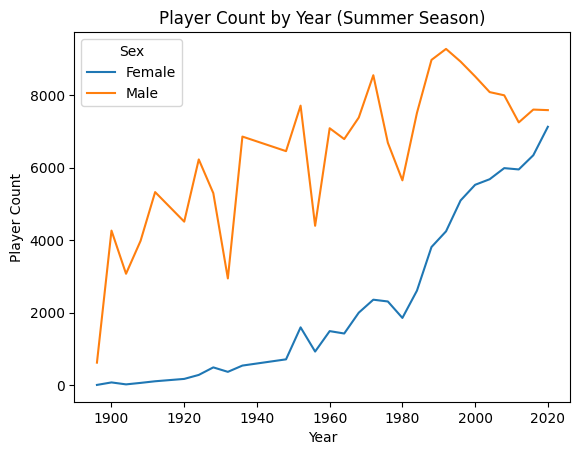

In [105]:
summer_athlete_to_year_df = athlete_to_year_df[athlete_to_year_df['season'] == 'Summer']
plt.figure(figsize=(10, 6))

# Create the line plot
summer_athlete_to_year_df.groupby(['year', 'sex'])['player_count'].sum().unstack().plot(kind='line')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Player Count')
plt.title('Player Count by Year (Summer Season)')
plt.legend(title='Sex')

# Show the plot
plt.show()

In [106]:
#filter data by year and medal type
mapped_medal_tally_df = pd.merge(medal_tally_df, country_codes_df, left_on='country', right_on='country', how='left')
filtered_medal_tally_df = mapped_medal_tally_df[(mapped_medal_tally_df['year'] >= 1980) & (mapped_medal_tally_df['year'] <= 2020)].copy()
filtered_medal_tally_df['total_medals'] = filtered_medal_tally_df[['gold', 'silver', 'bronze']].sum(axis=1)

yearly_medals_df = filtered_medal_tally_df.groupby(['country', 'year'])['total_medals'].sum().reset_index()
yearly_medals_df = yearly_medals_df.sort_values(by=['country', 'year'])

yearly_medals_df['cumulative_medals'] = yearly_medals_df.groupby('country')['total_medals'].cumsum()

top_countries = yearly_medals_df.groupby('country')['cumulative_medals'].max().nlargest(5).index

top_countries_df = yearly_medals_df[yearly_medals_df['country'].isin(top_countries)]
top_countries_df.head()


,country,year,total_medals,cumulative_medals
322,Germany,1992,108,108
323,Germany,1994,24,132
324,Germany,1996,65,197
325,Germany,1998,29,226
326,Germany,2000,56,282


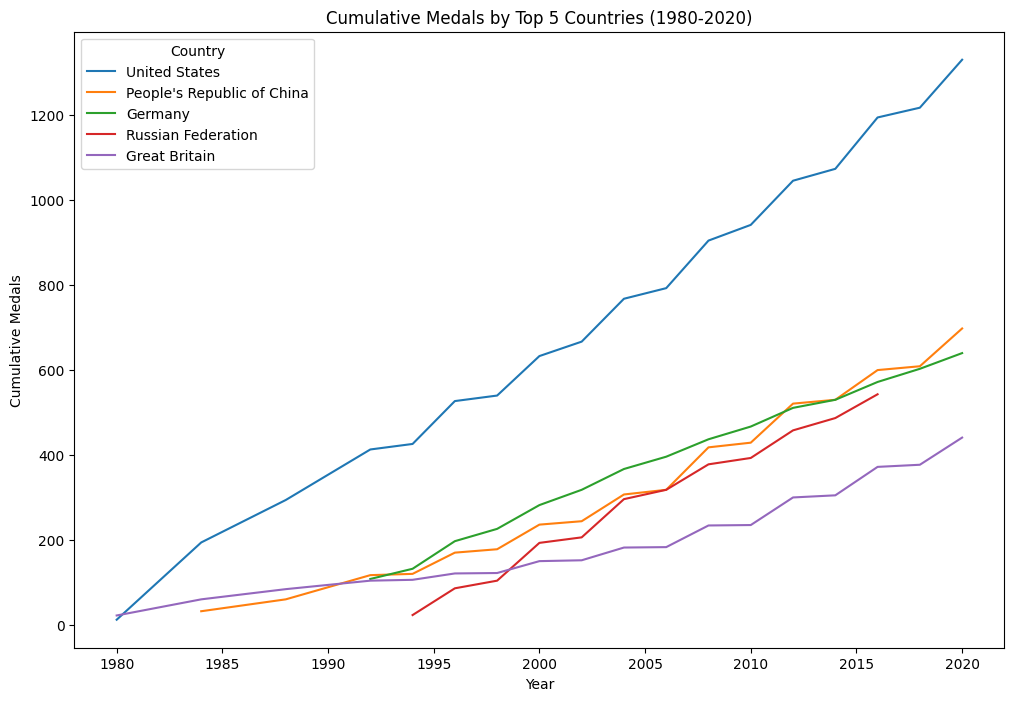

In [107]:
plt.figure(figsize=(12, 8))
for country in top_countries:
    country_data = top_countries_df[top_countries_df['country'] == country]
    plt.plot(country_data['year'], country_data['cumulative_medals'], label=country)
plt.xlabel('Year')
plt.ylabel('Cumulative Medals')
plt.title('Cumulative Medals by Top 5 Countries (1980-2020)')
plt.legend(title='Country')
plt.show()

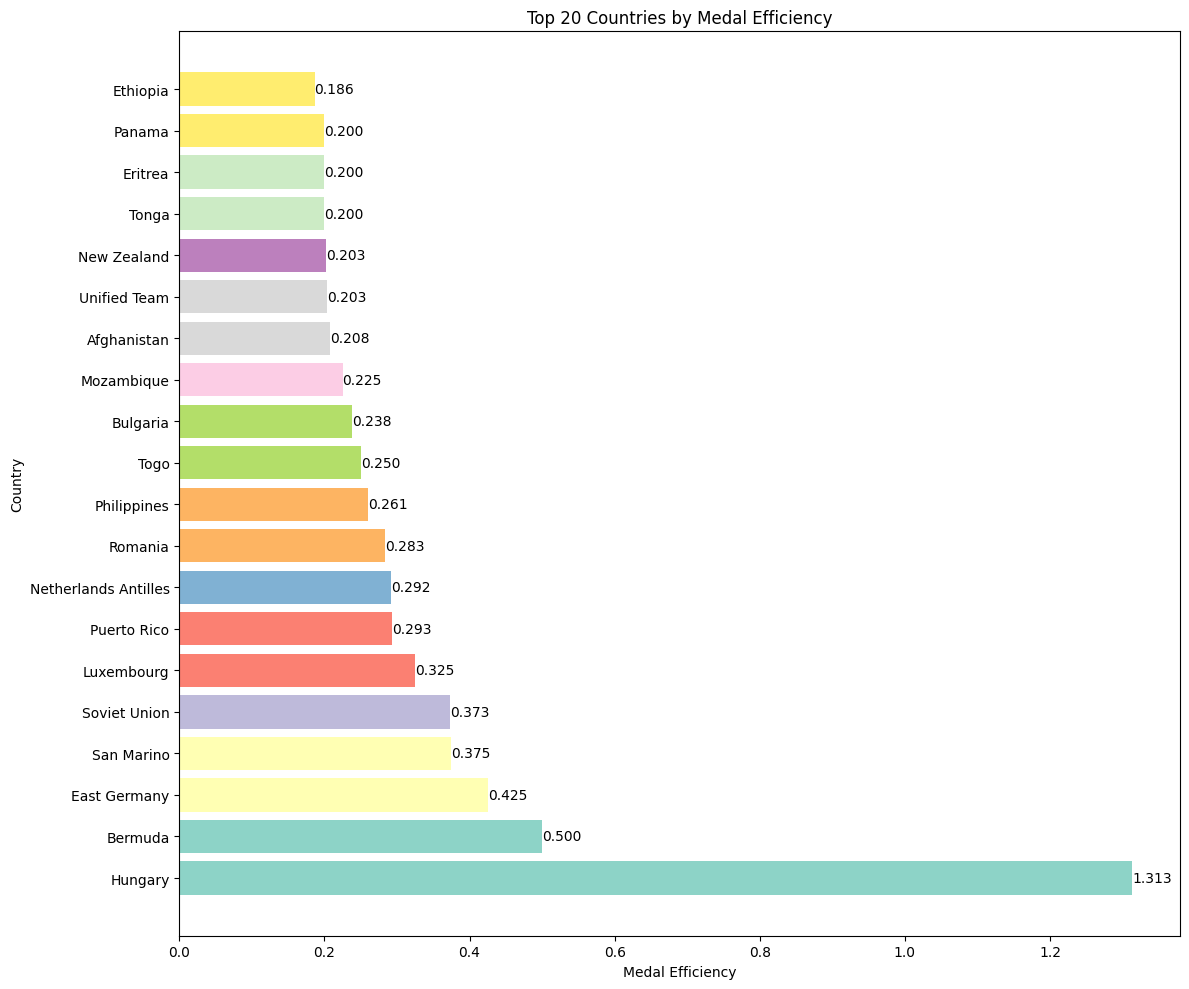

In [108]:
events_participation_df = athlete_event_results_df.groupby(['country_noc', 'edition']).size().reset_index(name='events_participated')

# Extract year from 'edition' and convert to int
events_participation_df['year'] = events_participation_df['edition'].str.extract('(\d{4})').astype(int)

# Merge using 'year' instead of 'edition'
merged_df = pd.merge(filtered_medal_tally_df, events_participation_df, left_on=['noc', 'year'], right_on=['country_noc', 'year'], how='left')

# Calculate medal efficiency
merged_df['medal_efficiency'] = merged_df['total_medals'] / merged_df['events_participated']

# Group and sort
medal_efficiency_df = merged_df.groupby('country')['medal_efficiency'].mean().sort_values(ascending=False).reset_index()

# Select top 20 countries by medal efficiency
top_20_countries = medal_efficiency_df.head(20)

# Create a horizontal bar plot with unique colors
plt.figure(figsize=(12, 10))
bars = plt.barh(top_20_countries['country'], top_20_countries['medal_efficiency'], 
                color=plt.cm.Set3(np.linspace(0, 1, 20)))

# Customize the plot
plt.title('Top 20 Countries by Medal Efficiency')
plt.xlabel('Medal Efficiency')
plt.ylabel('Country')

# Add value labels on the bars
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, 
             f'{width:.3f}', 
             ha='left', va='center')

plt.tight_layout()
plt.show()


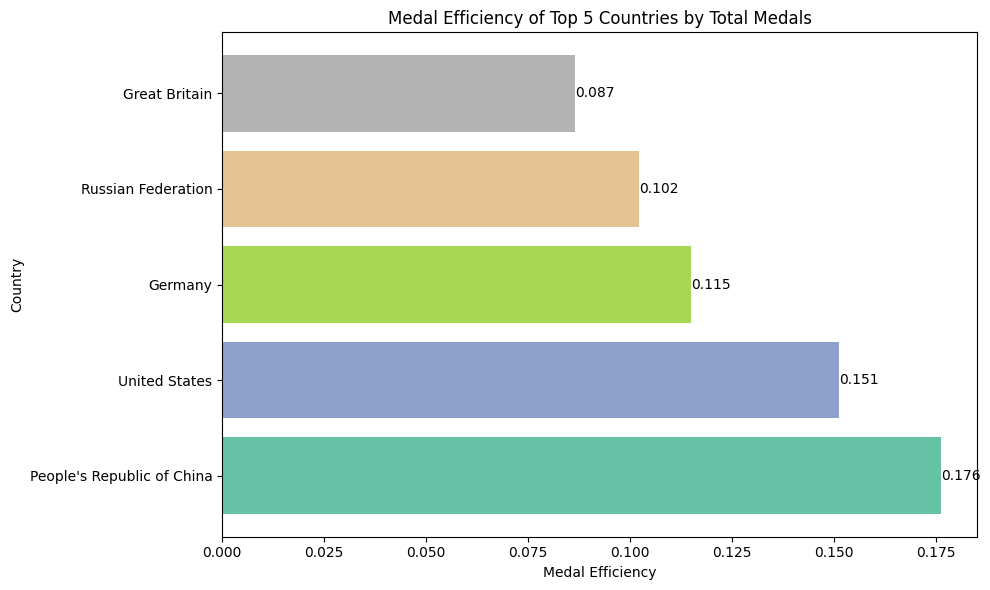

In [110]:
# Get the top 5 countries by total medals
top_5_countries = yearly_medals_df.groupby('country')['cumulative_medals'].max().nlargest(5).index

# Filter the medal_efficiency_df for these top 5 countries
top_5_efficiency = medal_efficiency_df[medal_efficiency_df['country'].isin(top_5_countries)]

# Sort by medal efficiency in descending order
top_5_efficiency = top_5_efficiency.sort_values('medal_efficiency', ascending=False)

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
bars = plt.barh(top_5_efficiency['country'], top_5_efficiency['medal_efficiency'], 
                color=plt.cm.Set2(np.linspace(0, 1, 5)))

# Customize the plot
plt.title('Medal Efficiency of Top 5 Countries by Total Medals')
plt.xlabel('Medal Efficiency')
plt.ylabel('Country')

# Add value labels on the bars
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, 
             f'{width:.3f}', 
             ha='left', va='center')

plt.tight_layout()
plt.show()